In [61]:

pip install geopandas matplotlib descartes


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------------------------- 51.1/51.1 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/9e/39/029c441d8af32ab423b229c4525ce5ce6707

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



# Exploratory Data Analysis (EDA)  of   PEA15 - Annual Population Change Component


Notebook provides an exploratory data analysis (EDA) of the PEA05  The complete series of datasets can be found at
[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

| Code   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |   EDAed      |
| PEA04  | Region                    |   Active here     |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |        |
| PEA24  | Citizenship Immigration   |        |
| PEA25  | Citizenship Population    |        |

Click on the image to explore reconfigure the data at source.

<a href="https://data.cso.ie/table/PEA01">
    <img src="../screens/pea15.png" alt="Example Image" width="500"/>
</a>






## Data Loading Data Libraries and Functions



In [62]:
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
# Adjusting default font sizes for all plots
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import geopandas as gpd




In [34]:
# Load the dataset
file_path = '../raw/PEA04.csv'
df_long = pd.read_csv(file_path)

In [35]:
# Preview top 5 rows
df_long.head() # Note examples of missing population change data in top few rows

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [36]:
#  Unique Values
df_long.nunique()

STATISTIC Label       1
Year                 13
Age Group            19
Sex                   3
Region                9
UNIT                  1
VALUE              1575
dtype: int64

In [37]:
# Unique values in non-numeric columns
{col: df_long[col].unique() for col in df_long.select_dtypes(include='object').columns}

{'STATISTIC Label': array(['Estimated Population (Persons in April)'], dtype=object),
 'Age Group': array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
        '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
        '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
        '80 - 84 years', '85 years and over', 'All ages'], dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'Region': array(['State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West',
        'Dublin', 'Mid-East', 'Midland'], dtype=object),
 'UNIT': array(['Thousand'], dtype=object)}

 ## Duplication

In [38]:
duplicates = df_long.duplicated()
duplicates.head()

# To see if there are any duplicates
any_duplicates = duplicates.any()

# Print result based on the condition
if any_duplicates:
    print("There are duplicated rows in dataframe df_long.")
else:
    print("There are no duplicated rows in dataframe df_long.")


There are no duplicated rows in dataframe df_long.


In [39]:
#  Data Structure and Types
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


## Long Dataframe housekeeping 
 


In [40]:
# Check if the columns 'STATISTIC Label' and 'UNIT' exist in the DataFrame
columns_to_drop = [col for col in ['STATISTIC Label', 'UNIT'] if col in df_long.columns]

# Drop the columns if they exist
if columns_to_drop:
    df_long = df_long.drop(columns_to_drop, axis=1)


# Renaming the remaining columns
df_long = df_long.rename(columns={
    'Year': 'year',
    'Age Group': 'age_group',
    'Sex': 'sex',
    'VALUE': 'value',
    'Region':'region'
})
#preview changes
df_long.head()

,year,age_group,sex,region,value
0,2011,0 - 4 years,Both sexes,State,356.0
1,2011,0 - 4 years,Both sexes,Border,30.7
2,2011,0 - 4 years,Both sexes,West,32.6
3,2011,0 - 4 years,Both sexes,Mid-West,35.0
4,2011,0 - 4 years,Both sexes,South-East,32.0


In [41]:
# NaNs mask summed per column.
df_long.isna().sum()

year         0
age_group    0
sex          0
region       0
value        0
dtype: int64

In [42]:
df_long.columns

Index(['year', 'age_group', 'sex', 'region', 'value'], dtype='object')

In [43]:

# Save the clean DataFrame to a new CSV file
df_long.to_csv('../data/region_long.csv', index=True)

In [44]:
#  Unique Values
df_long.nunique()

year           13
age_group      19
sex             3
region          9
value        1575
dtype: int64

In [45]:
df_long.age_group.nunique()

19

In [46]:
# Unique values in non-numeric columns
{col: df_long[col].unique() for col in df_long.select_dtypes(include='object').columns}

{'age_group': array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
        '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
        '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
        '80 - 84 years', '85 years and over', 'All ages'], dtype=object),
 'sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'region': array(['State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West',
        'Dublin', 'Mid-East', 'Midland'], dtype=object)}

In [47]:
df_long.sample(11)

,year,age_group,sex,region,value
3235,2017,25 - 29 years,Female,South-East,11.4
2843,2016,50 - 54 years,Both sexes,Midland,18.6
4335,2019,40 - 44 years,Male,Dublin,53.5
4334,2019,40 - 44 years,Male,South-West,27.0
6335,2023,30 - 34 years,Male,Midland,9.1
6070,2022,75 - 79 years,Female,South-East,7.8
6111,2022,85 years and over,Male,State,31.6
3625,2018,5 - 9 years,Both sexes,Mid-East,59.9
3988,2018,70 - 74 years,Female,Border,8.2
5798,2022,25 - 29 years,Female,West,12.0


In [48]:
# Creating a DataFrame filtered for 'All ages'
df_all_ages = df_long[df_long['age_group'] == 'All ages']
df_all_ages.head()

,year,age_group,sex,region,value
486,2011,All ages,Both sexes,State,4574.9
487,2011,All ages,Both sexes,Border,391.9
488,2011,All ages,Both sexes,West,440.8
489,2011,All ages,Both sexes,Mid-West,466.8
490,2011,All ages,Both sexes,South-East,410.3


In [49]:
# Pivot for 'region'
pivot_region = df_long.pivot_table(index=['year', 'sex', 'age_group'], columns='region', values='value', aggfunc='first')
pivot_region = pivot_region.reset_index()
# Save
pivot_region.to_csv('../data/region_pivot_by_age.csv', index=True)
pivot_region.head()

region,year,sex,age_group,Border,Dublin,Mid-East,Mid-West,Midland,South-East,South-West,State,West
0,2011,Both sexes,0 - 4 years,30.7,93.3,58.5,35.0,23.9,32.0,50.1,356.0,32.6
1,2011,Both sexes,10 - 14 years,28.1,72.8,46.9,32.0,20.4,28.5,43.3,301.0,29.0
2,2011,Both sexes,15 - 19 years,25.9,72.0,40.7,29.9,18.1,25.9,40.8,281.0,27.9
3,2011,Both sexes,20 - 24 years,23.8,93.6,39.7,29.3,17.4,24.9,42.0,298.6,28.1
4,2011,Both sexes,25 - 29 years,26.3,125.9,47.8,32.7,21.0,28.2,49.2,362.9,31.7


In [50]:
# Pivot for 'age'
pivot_age= df_long.pivot_table(index=['year', 'sex', 'region'], columns='age_group', values='value', aggfunc='first')
pivot_age = pivot_age.reset_index()
# Save
pivot_age.to_csv('../data/age_pivot_by_region.csv', index=True)
pivot_age.head()

age_group,year,sex,region,0 - 4 years,10 - 14 years,15 - 19 years,20 - 24 years,25 - 29 years,30 - 34 years,35 - 39 years,...,5 - 9 years,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
0,2011,Both sexes,Border,30.7,28.1,25.9,23.8,26.3,29.1,28.7,...,28.4,24.0,22.0,20.2,16.1,12.1,9.7,6.9,6.3,391.9
1,2011,Both sexes,Dublin,93.3,72.8,72.0,93.6,125.9,127.2,103.7,...,78.6,71.4,62.4,55.2,43.3,34.8,27.2,18.7,14.6,1261.5
2,2011,Both sexes,Mid-East,58.5,46.9,40.7,39.7,47.8,56.4,56.9,...,52.4,38.2,33.0,28.7,22.2,15.0,10.8,7.2,6.3,657.4
3,2011,Both sexes,Mid-West,35.0,32.0,29.9,29.3,32.7,36.2,35.3,...,32.4,29.2,26.6,24.4,19.2,14.4,11.2,7.8,6.3,466.8
4,2011,Both sexes,Midland,23.9,20.4,18.1,17.4,21.0,23.0,22.0,...,21.9,17.0,14.9,13.0,10.3,7.6,6.1,4.2,3.5,283.8


### Ongoing research
These mortality, fertility, and migration figures will be merged with population and other data from  [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme)

The State region population change over time since 2000.


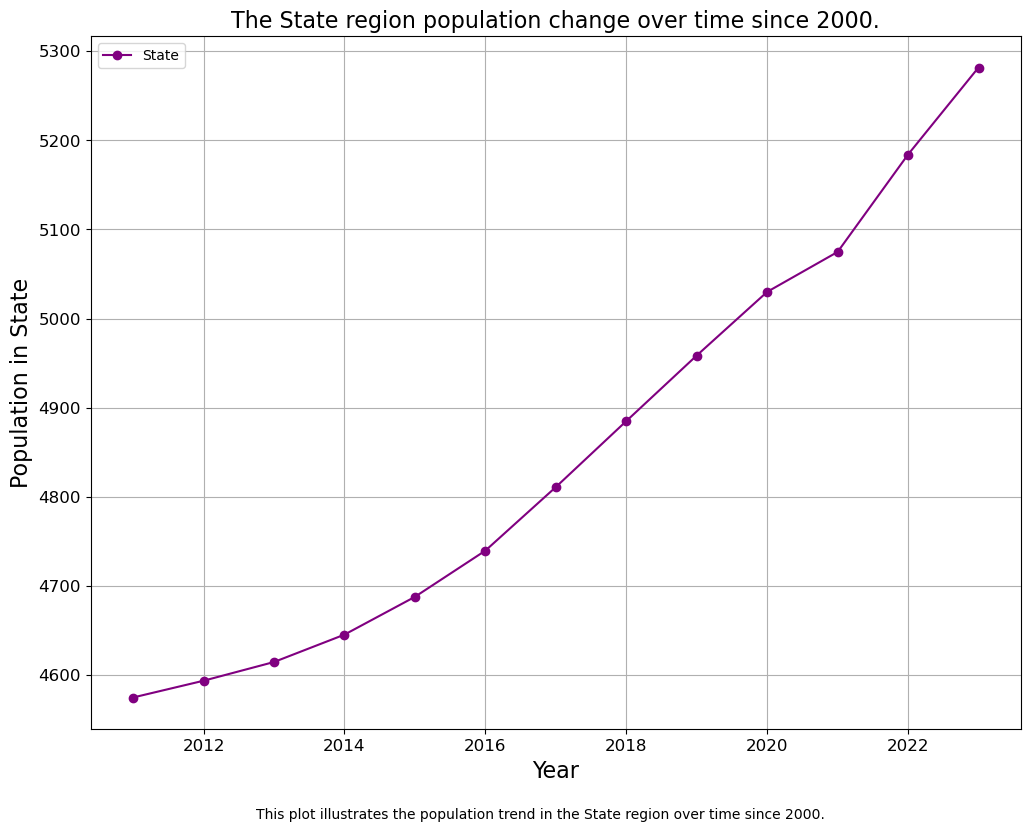

In [52]:
# Define the string and input date as per the provided style
string = 'State'  # For example, we choose 'Dublin' as the region to plot
input_date = 2000

# Filter the data for the desired years and for 'All ages', 'Both sexes'
filtered_df = pivot_region[(pivot_region['year'] >= input_date) & 
                           (pivot_region['age_group'] == 'All ages') & 
                           (pivot_region['sex'] == 'Both sexes')]

# Create a figure with a specified size
plt.figure(figsize=(12, 9))

# Plot the data with markers and labels
plt.plot(filtered_df['year'], filtered_df[string], marker='o', label=string, color='purple')

# Set the title, axis labels, and legend
title = f'The {string} region population change over time since {input_date}.'
plt.title(title)
plt.xlabel('Year')
plt.ylabel('Population in ' + string)

# Customize the legend label
plt.legend([string])

# Add a grid and a LaTeX-style caption with variables
plt.grid(True)
caption = f"This plot illustrates the population trend in the {string} region over time since {input_date}."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)

# Print the title as text to speed up report writing
print(title)

# Save the plot before displaying it
plt.savefig(f'{string}_region_population_since_{input_date}.png')

# Display the plot
plt.show()

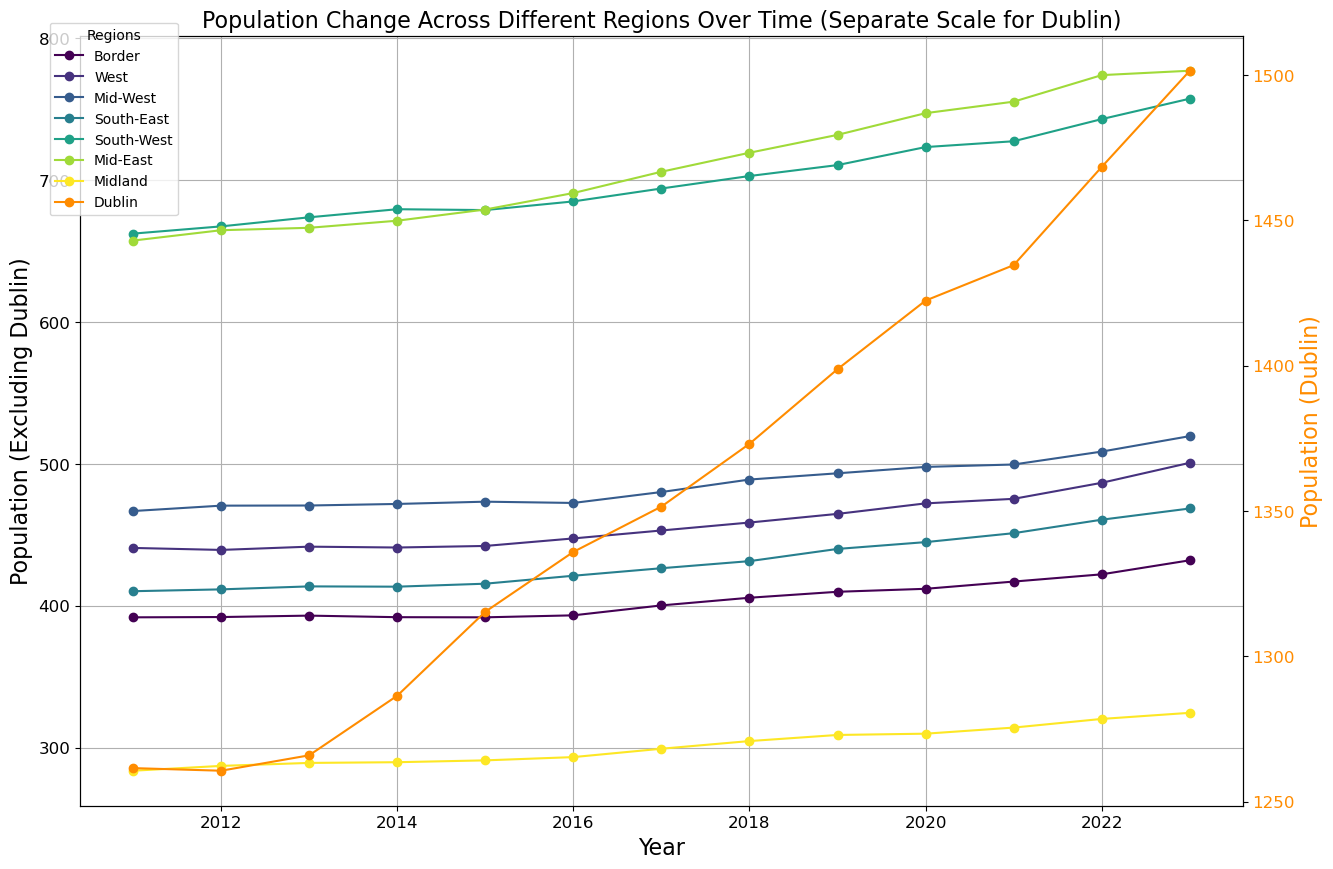

In [56]:

# Filtering the pivot_region data for 'All ages' and 'Both sexes' across all years
filtered_all_regions = pivot_region[(pivot_region['age_group'] == 'All ages') & (pivot_region['sex'] == 'Both sexes')]

# Define a list of regions to plot, excluding 'State'
regions_to_plot_excluding_state = ['Border', 'West', 'Mid-West', 'South-East', 'South-West', 'Dublin', 'Mid-East', 'Midland']

# Defining a color palette for better distinction between regions
colors = plt.cm.viridis(np.linspace(0, 1, len(regions_to_plot_excluding_state)))

# Create a figure with a specified size
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plotting the data for each region except Dublin with markers
for idx, region in enumerate(regions_to_plot_excluding_state):
    if region != 'Dublin':
        ax1.plot(filtered_all_regions['year'], filtered_all_regions[region], marker='o', label=region, color=colors[idx])

# Setting the primary y-axis label
ax1.set_ylabel('Population (Excluding Dublin)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Creating a secondary y-axis for Dublin
ax2 = ax1.twinx()  
ax2.plot(filtered_all_regions['year'], filtered_all_regions['Dublin'], marker='o', label='Dublin', color='darkorange')
ax2.set_ylabel('Population (Dublin)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Setting the title, x-axis label, and legend
plt.title('Population Change Across Different Regions Over Time (Separate Scale for Dublin)')
ax1.set_xlabel('Year')
fig.legend(title="Regions", loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Add a grid
ax1.grid(True)

# Save the plot before displaying it
plt.savefig('../images/all_regions_population_change_separate_scale_dublin.png')

# Display the plot
plt.show()

In [58]:
# Calculating descriptive statistics for each age group across different regions
desc_stats = pivot_age.describe()

# Calculating the correlation matrix
corr_matrix = pivot_age.corr()

desc_stats, corr_matrix

(age_group         year  0 - 4 years  10 - 14 years  15 - 19 years  \
 count       351.000000   351.000000     351.000000     351.000000   
 mean       2017.000000    48.333048      49.388319      45.908547   
 std           3.746999    67.439058      68.658601      63.826235   
 min        2011.000000     9.000000      10.000000       8.900000   
 25%        2014.000000    14.900000      16.050000      15.050000   
 50%        2017.000000    24.900000      26.200000      23.300000   
 75%        2020.000000    44.250000      41.650000      40.750000   
 max        2023.000000   358.200000     379.200000     349.500000   
 
 age_group  20 - 24 years  25 - 29 years  30 - 34 years  35 - 39 years  \
 count         351.000000     351.000000     351.000000     351.000000   
 mean           43.419658      45.642165      52.932764      56.683476   
 std            61.105378      65.247172      75.217308      79.572228   
 min             7.500000       8.000000       9.100000      10.900000  

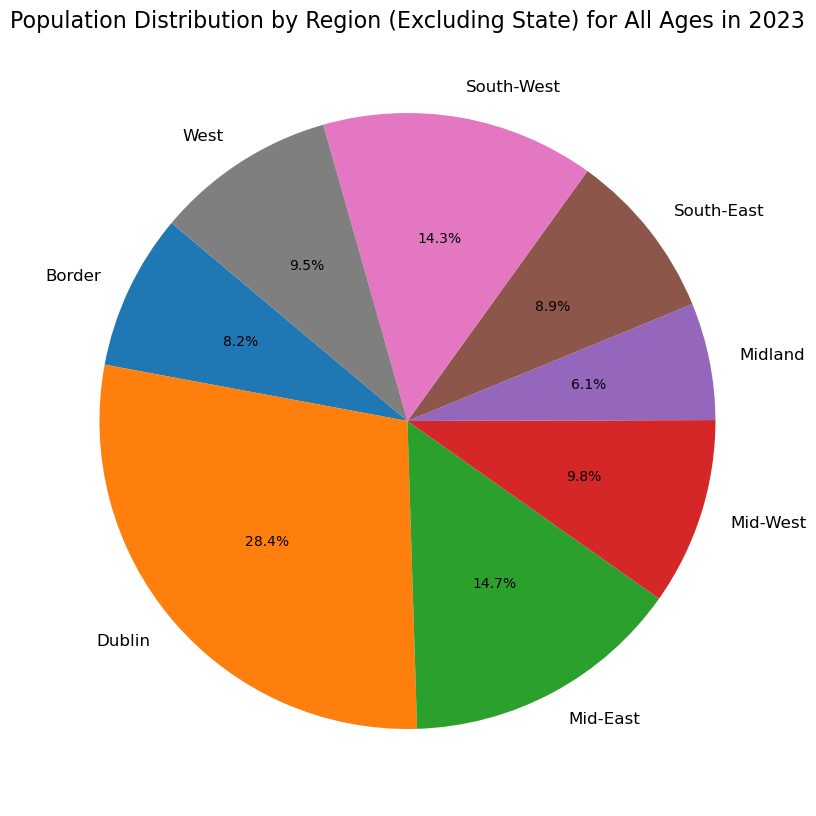

In [65]:
# Filtering data for 'All ages' in the year 2023 across different regions
data_2023_all_ages = pivot_region[(pivot_region['year'] == 2023) & (pivot_region['age_group'] == 'All ages') & (pivot_region['sex'] == 'Both sexes')]

# Extracting the first row as the data is the same for 'Both sexes'
data_2023_all_ages = data_2023_all_ages.iloc[0]

# Removing non-region columns before plotting
data_2023_all_ages = data_2023_all_ages.drop(['year', 'sex', 'age_group'])

# Removing the 'State' column before plotting the pie chart
data_2023_all_ages_without_state = data_2023_all_ages.drop('State')

# Creating a pie chart without the 'State' data
plt.figure(figsize=(10, 10))
plt.pie(data_2023_all_ages_without_state, labels=data_2023_all_ages_without_state.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution by Region (Excluding State) for All Ages in 2023')

plt.show()